In [32]:
from mean_plane import Data,Log,Visualization,CollisionHandler

In [33]:
import numpy as np

In [34]:
path = "Matheus_Campo/2022-07-15-14-45"
img_name = "2022-07-15-14-45-Frame-12.jpg"
# Using cv2.imread() method
#img = cv2.imread(path+"/"+img_name)

# Displaying the image
#cv2.imshow('image', img)
#cv2.waitKey(50)
#for k in range(2,36):

k = 12
data             = Data(path,frame = k)
#viz              = Visualization()
#collisionHandler = CollisionHandler()


logs = []
for position,quaternion in zip(data.positions,data.rotations):
    x,y,z,r = position
    logs.append(Log(x,y,z,r,quaternion))

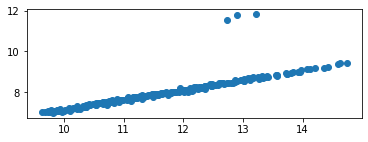

In [35]:
import matplotlib.pyplot as plt
mask = data.positions#[:,2]<10
points = data.positions#[mask]
plt.figure(figsize = (6,2))
plt.scatter(points[:,0],points[:,2])

In [8]:
#data.positions = data.positions[data.positions[:,2]]

In [10]:
from sklearn import linear_model

def RANSAC(X,y,max_trials = 130,min_samples = 0.8,stop_probability = 0.99):
    X,y = X.reshape(-1,1),y.reshape(-1,1)
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor(max_trials       = max_trials, 
                                          min_samples      = min_samples,
                                          stop_probability = stop_probability )
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    #line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)
    
    return line_X, line_y_ransac

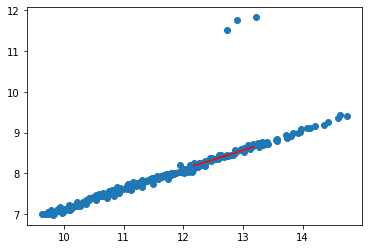

In [38]:
line_X, line_z_ransac = RANSAC(points[:20,0],points[:20,2])
plt.scatter(points[:,0],points[:,2])                            
plt.plot(line_X, line_z_ransac,c = 'red')

9.635 6.957372619251832 -1
10.635 7.436878778516091 -1
11.635 7.91638493778035 -1
12.635 8.39589109704461 -1
13.635 8.875397256308869 -1
14.635 9.354903415573126 -1


In [39]:
vertex    = [(line_X[0][0], line_z_ransac[0][0] ,-1 ),
             (line_X[0][0], line_z_ransac[0][0] ,1.7),
             (line_X[-1][0],line_z_ransac[-1][0],-1 ),
             (line_X[-1][0],line_z_ransac[-1][0],1.7)  ]
triangles = [(0,1,2),(1,2,3)]
vertex    = np.array(vertex)
triangles = np.array(triangles)

In [ ]:
Quaternion q;
vector a = crossproduct(v1, v2);
q.xyz = a;
q.w = sqrt((v1.Length ^ 2) * (v2.Length ^ 2)) + dotproduct(v1, v2);

In [44]:
def normalize(v):
    return v / (max(np.linalg.norm(v), 1e-16))

In [50]:
v1 = vertex[0]-vertex[2]  
v2 = vertex[0]-vertex[1]  
v1 = normalize(v1)
v2 = normalize(v2)
normal = np.cross(v1, v2)

In [62]:
u = normal
v = np.array([1,0,0])
quaternion = np.array([1+np.dot(u, v)] + list(np.cross(u, v)))
quaternion = normalize(quaternion)

quaternion


array([ 0.84256329, -0.        ,  0.        ,  0.53859735])

In [ ]:
Quaternion(1 + dot(u, v), cross(u, v)).normalize()